# K-Nearest Neighbors (KNN) Classification Tutorial
## A Complete Guide to Understanding and Implementing KNN with Python

![KNN Algorithm](https://miro.medium.com/v2/resize:fit:1400/1*wW8O-0xVQUFhBGexx2B6hg.png)

---

### What You'll Learn
- **KNN Algorithm**: How it works and why it's powerful
- **Data Visualization**: Beautiful plots to understand your data  
- **Model Building**: Step-by-step implementation with scikit-learn
- **Performance Evaluation**: Professional model assessment techniques

### Dataset: Iris Flower Classification
We'll use the famous **Iris dataset** to classify flowers into three species:
- **Setosa** 
- **Versicolor**
- **Virginica**

![Iris Species](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjku000Tn3-PngfzfEX9VxFlWPc9Rm4jbeJg&s)

---

*Let's build something amazing together!*

## Required Libraries

Before we start, let's import all the necessary libraries we'll need for this tutorial.

In [95]:
# Essential libraries for machine learning and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn components
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Configure plotting and suppress warnings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set up plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'Arial'  # Use Arial to avoid emoji font issues

print("All libraries imported successfully!")
print("Ready to build KNN models!")

All libraries imported successfully!
Ready to build KNN models!


In [96]:
import pandas as pd
from sklearn.datasets import load_iris

# 🌸 Loading the Famous Iris Dataset
# This is like the "Hello World" of machine learning! 

# Why Iris dataset? 🤔
# - Perfect size: Not too big, not too small
# - Clean data: No messy preprocessing needed
# - 3 clear classes: Easy to visualize and understand
# - Real-world relevance: Actual biological measurements

print("🌺 Loading the Iris dataset...")
iris = load_iris()

# Quick overview of our data
print("Iris Dataset Overview")
print("=" * 30)
print(f"Samples: {iris.data.shape[0]}")
print(f"Features: {iris.data.shape[1]}")
print(f"Classes: {len(iris.target_names)}")
print(f"Species: {', '.join(iris.target_names)}")

🌺 Loading the Iris dataset...
Iris Dataset Overview
Samples: 150
Features: 4
Classes: 3
Species: setosa, versicolor, virginica


In [97]:
# 🔬 Exploring Our Features (The Iris Measurements)

print("🌸 What measurements do we have for each flower?")
print("=" * 50)

features = iris.feature_names
feature_emojis = ["📏", "📐", "🌺", "🌸"]

# Explore the features (measurements) we have
print("Flower Measurements (Features):")
for i, feature in enumerate(iris.feature_names):
    print(f"  {i+1}. {feature}")

print(f"\nTarget Classes:")
for i, target in enumerate(iris.target_names):
    print(f"  {i}. {target.capitalize()}")

print(f"\nFeature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")

print("\n💡 Think of these as the 'DNA' of each flower!")
print("   Just like humans have unique fingerprints,")
print("   each flower species has unique measurements! 🧬")

# Pro tip about features! 💡
print("\n🎯 Pro Tip:")
print("   • Sepal: The outer part that protects the flower bud")
print("   • Petal: The colorful part that attracts pollinators") 
print("   • Length & Width: Measured in centimeters")

🌸 What measurements do we have for each flower?
Flower Measurements (Features):
  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)

Target Classes:
  0. Setosa
  1. Versicolor
  2. Virginica

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

💡 Think of these as the 'DNA' of each flower!
   Just like humans have unique fingerprints,
   each flower species has unique measurements! 🧬

🎯 Pro Tip:
   • Sepal: The outer part that protects the flower bud
   • Petal: The colorful part that attracts pollinators
   • Length & Width: Measured in centimeters


In [98]:
# 📊 Creating Our Beautiful DataFrame
# Converting raw data into a pandas DataFrame for easy manipulation! 

print("🔄 Converting data to pandas DataFrame...")
print("   (Think of this as putting data into a neat Excel-like table!)")

# Create a clean DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("DataFrame created successfully!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

# Let's see our first 5 rows with some style! ✨
print("\n🎉 First 5 flowers in our dataset:")
print("=" * 60)

# Display with custom formatting
styled_df = df.head()
print(styled_df.to_string(float_format='{:.1f}'.format))

print("\n💭 What we're looking at:")
print("   • Each ROW = One individual flower")
print("   • Each COLUMN = One measurement feature") 
print("   • Each VALUE = Measurement in centimeters")

# Some quick stats to get familiar with our data
print(f"\n📈 Quick Stats:")
print(f"   • Smallest sepal length: {df['sepal length (cm)'].min():.1f} cm")
print(f"   • Largest sepal length: {df['sepal length (cm)'].max():.1f} cm")
print(f"   • Average petal width: {df['petal width (cm)'].mean():.1f} cm")

🔄 Converting data to pandas DataFrame...
   (Think of this as putting data into a neat Excel-like table!)
DataFrame created successfully!
Shape: (150, 6)

First 5 rows:

🎉 First 5 flowers in our dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target species
0                5.1               3.5                1.4               0.2       0  setosa
1                4.9               3.0                1.4               0.2       0  setosa
2                4.7               3.2                1.3               0.2       0  setosa
3                4.6               3.1                1.5               0.2       0  setosa
4                5.0               3.6                1.4               0.2       0  setosa

💭 What we're looking at:
   • Each ROW = One individual flower
   • Each COLUMN = One measurement feature
   • Each VALUE = Measurement in centimeters

📈 Quick Stats:
   • Smallest sepal length: 4.3 cm
   • Largest sepal length: 7.9 cm
   • Av

## 📊 Data Preparation

Let's explore our dataset to understand the characteristics of each flower species.

![Exploring](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYm1mNzN3MXlkamRibGs3aGN4NWoydXZjOW5lMDBudzhiOHRvdmh1OCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/HFdrAgiVsy2FNF1tVP/giphy.gif)

In [99]:
# 🎯 Adding Target Labels to Our DataFrame
# Now we're connecting measurements to actual flower species!

print("🔗 Adding the target species to our data...")

# Add the target column (species labels as numbers)
df['target'] = iris.target

print("✅ Target column added!")

# Display the enhanced DataFrame
print("\n🌟 Our Complete Dataset (first 5 rows):")
print("=" * 70)

# Create a more informative display
display_df = df.head().copy()
# Add species names for clarity
species_map = {0: '🌿 Setosa', 1: '🌸 Versicolor', 2: '🌺 Virginica'}

print("Features + Target Labels:")
for i, row in display_df.iterrows():
    species = species_map[row['target']]
    print(f"Row {i+1}: {species}")
    
print("\n" + df.head().to_string(float_format='{:.1f}'.format))

print("\n🎓 Understanding the Target Column:")
print("   • 0 = Setosa (🌿)")
print("   • 1 = Versicolor (🌸)")  
print("   • 2 = Virginica (🌺)")

print(f"\n📊 Class Distribution:")
class_counts = df['target'].value_counts().sort_index()
for class_num, count in class_counts.items():
    species_name = iris.target_names[class_num]
    print(f"   • {species_name.capitalize()}: {count} samples")

# Check the distribution of species
print("Species Distribution:")
print(df['species'].value_counts())

# Basic statistics
print(f"\nDataset Statistics:")
df.describe().round(2)

🔗 Adding the target species to our data...
✅ Target column added!

🌟 Our Complete Dataset (first 5 rows):
Features + Target Labels:
Row 1: 🌿 Setosa
Row 2: 🌿 Setosa
Row 3: 🌿 Setosa
Row 4: 🌿 Setosa
Row 5: 🌿 Setosa

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target species
0                5.1               3.5                1.4               0.2       0  setosa
1                4.9               3.0                1.4               0.2       0  setosa
2                4.7               3.2                1.3               0.2       0  setosa
3                4.6               3.1                1.5               0.2       0  setosa
4                5.0               3.6                1.4               0.2       0  setosa

🎓 Understanding the Target Column:
   • 0 = Setosa (🌿)
   • 1 = Versicolor (🌸)
   • 2 = Virginica (🌺)

📊 Class Distribution:
   • Setosa: 50 samples
   • Versicolor: 50 samples
   • Virginica: 50 samples
Species Distribution:
species


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


## 🔍 **Exploring Each Flower Species**
### *Getting to Know Our Data Like Old Friends!*

Now that we have our data organized, let's get acquainted with each flower species individually. This is like meeting each character in a story before the plot unfolds! 🌸📖

**Why explore each class separately?** 🤔
- 🎯 **Pattern Recognition**: Spot unique characteristics of each species
- 📊 **Data Quality Check**: Ensure we have balanced, clean data
- 🧠 **Intuition Building**: Develop a feel for what makes each species special
- 🔮 **Prediction Preparation**: Understand what our model will learn

---

### 🌸 **Class 1: Versicolor** 
*The elegant middle child of the iris family*

## Data Visualization

Let's create beautiful visualizations to understand our data better. These plots will help us see how KNN can distinguish between different flower species.

![KNN Visualization Example](https://www.tutorialspoint.com/machine_learning/images/circle.jpg)

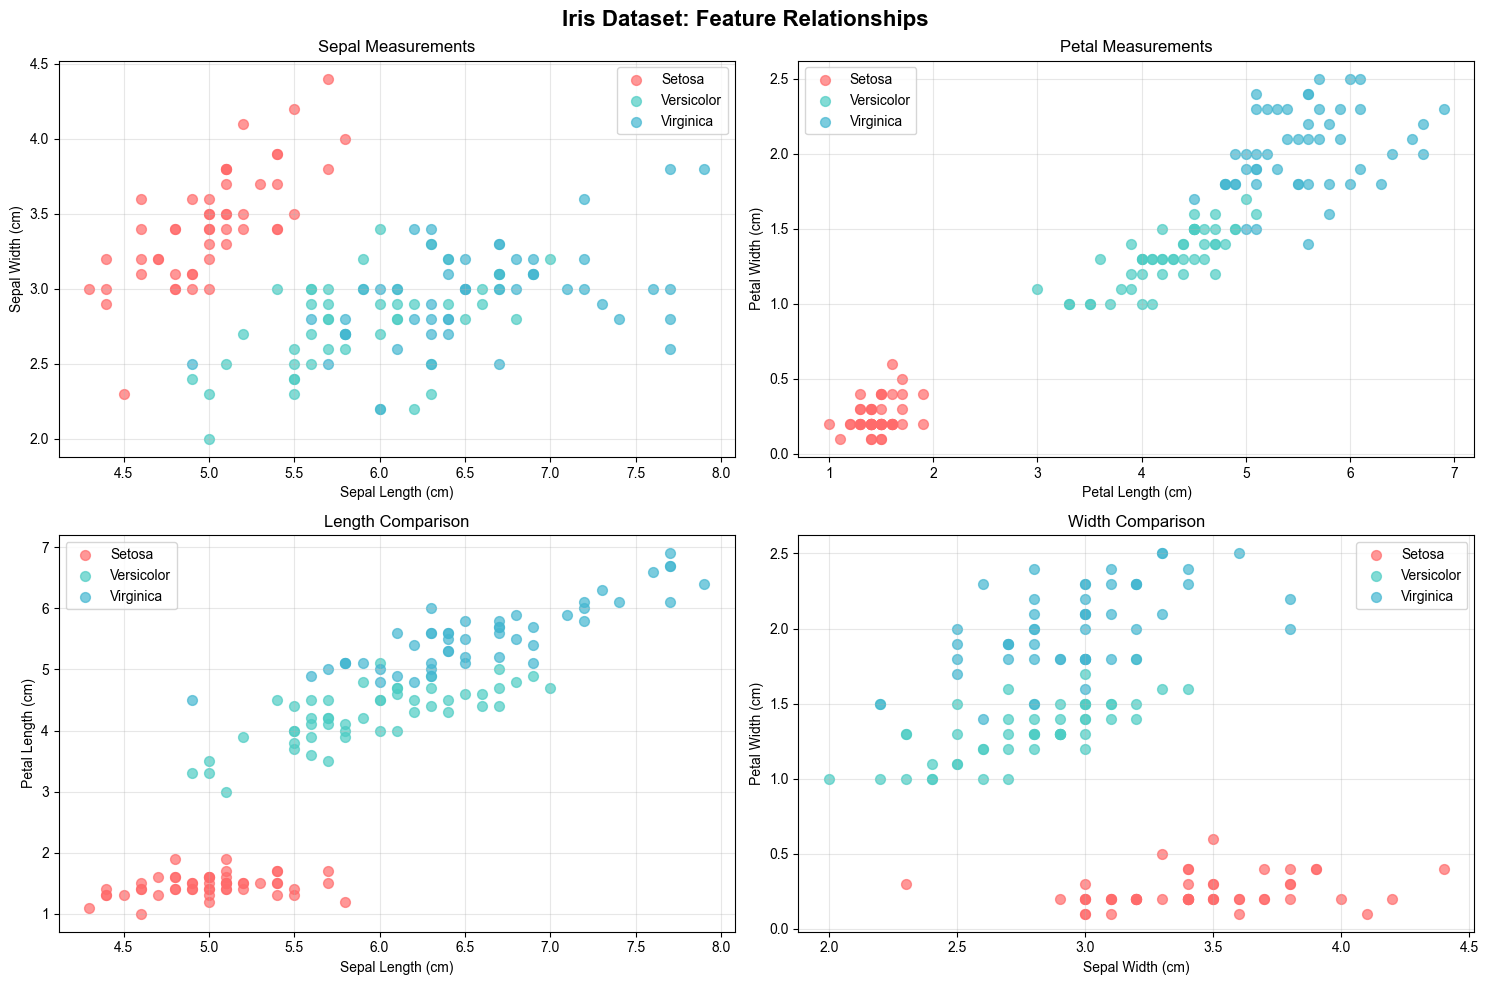

Key Observations:
• Setosa is clearly separable from other species
• Petal measurements show the best separation
• This is why KNN will work well on this dataset!


In [100]:
# Create a comprehensive visualization of our iris dataset
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Iris Dataset: Feature Relationships', fontsize=16, fontweight='bold')

# Colors for each species
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
species = ['setosa', 'versicolor', 'virginica']

# Plot 1: Sepal Length vs Width
for i, sp in enumerate(species):
    subset = df[df['species'] == sp]
    axes[0,0].scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                     c=colors[i], label=f'{sp.capitalize()}', alpha=0.7, s=50)
axes[0,0].set_xlabel('Sepal Length (cm)')
axes[0,0].set_ylabel('Sepal Width (cm)')
axes[0,0].set_title('Sepal Measurements')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Petal Length vs Width  
for i, sp in enumerate(species):
    subset = df[df['species'] == sp]
    axes[0,1].scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                     c=colors[i], label=f'{sp.capitalize()}', alpha=0.7, s=50)
axes[0,1].set_xlabel('Petal Length (cm)')
axes[0,1].set_ylabel('Petal Width (cm)')
axes[0,1].set_title('Petal Measurements')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Sepal Length vs Petal Length
for i, sp in enumerate(species):
    subset = df[df['species'] == sp]
    axes[1,0].scatter(subset['sepal length (cm)'], subset['petal length (cm)'], 
                     c=colors[i], label=f'{sp.capitalize()}', alpha=0.7, s=50)
axes[1,0].set_xlabel('Sepal Length (cm)')
axes[1,0].set_ylabel('Petal Length (cm)')
axes[1,0].set_title('Length Comparison')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Sepal Width vs Petal Width
for i, sp in enumerate(species):
    subset = df[df['species'] == sp]
    axes[1,1].scatter(subset['sepal width (cm)'], subset['petal width (cm)'], 
                     c=colors[i], label=f'{sp.capitalize()}', alpha=0.7, s=50)
axes[1,1].set_xlabel('Sepal Width (cm)')
axes[1,1].set_ylabel('Petal Width (cm)')
axes[1,1].set_title('Width Comparison')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Observations:")
print("• Setosa is clearly separable from other species")
print("• Petal measurements show the best separation")
print("• This is why KNN will work well on this dataset!")

In [101]:
# 🌸 Let's examine Versicolor flowers (Class 1)
print("🌸 Versicolor Flowers - The Balanced Beauties")
print("=" * 50)

versicolor_data = df[df.target == 1].head()
print("Sample Versicolor measurements:")
print(versicolor_data.to_string(index=False, float_format='{:.1f}'.format))

# Get some insights about Versicolor
versicolor_stats = df[df.target == 1].describe()
print(f"\n📊 Versicolor Statistics:")
print(f"   • Average sepal length: {versicolor_stats.loc['mean', 'sepal length (cm)']:.1f} cm")
print(f"   • Average petal length: {versicolor_stats.loc['mean', 'petal length (cm)']:.1f} cm")
print(f"   • Count: {len(df[df.target == 1])} flowers")

print("\n🌺 Virginica Flowers - The Majestic Giants")
print("=" * 50)

virginica_data = df[df.target == 2].head()
print("Sample Virginica measurements:")
print(virginica_data.to_string(index=False, float_format='{:.1f}'.format))

# Get some insights about Virginica
virginica_stats = df[df.target == 2].describe()
print(f"\n📊 Virginica Statistics:")
print(f"   • Average sepal length: {virginica_stats.loc['mean', 'sepal length (cm)']:.1f} cm")
print(f"   • Average petal length: {virginica_stats.loc['mean', 'petal length (cm)']:.1f} cm")
print(f"   • Count: {len(df[df.target == 2])} flowers")

print("\n🤔 Initial Observations:")
print("   • Virginica tends to have longer petals")
print("   • Versicolor sits in the middle range")
print("   • Each species has distinct characteristics!")


🌸 Versicolor Flowers - The Balanced Beauties
Sample Versicolor measurements:
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target    species
               7.0               3.2                4.7               1.4       1 versicolor
               6.4               3.2                4.5               1.5       1 versicolor
               6.9               3.1                4.9               1.5       1 versicolor
               5.5               2.3                4.0               1.3       1 versicolor
               6.5               2.8                4.6               1.5       1 versicolor

📊 Versicolor Statistics:
   • Average sepal length: 5.9 cm
   • Average petal length: 4.3 cm
   • Count: 50 flowers

🌺 Virginica Flowers - The Majestic Giants
Sample Virginica measurements:
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target   species
               6.3               3.3                6.0               2.5       2 

## Building the KNN Model

Now let's build our K-Nearest Neighbors classifier step by step.

![KNN Algorithm GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcm9venYwZTB3cjFhNWtpM2tuODBlNXZvbG9qMmtqMHFpNHF5cGE4eiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/5dYeglPmPC5lL7xYhs/giphy.gif)

### Step 1: Prepare Features and Target Variables

Before we can train our KNN model, we need to organize our data properly:

- **Features (X)**: The flower measurements (sepal length, sepal width, petal length, petal width)
- **Target (y)**: The species labels (setosa, versicolor, virginica)

Let's prepare our data for machine learning!

In [102]:
# Prepare features (X) and target (y) for machine learning
X = df.drop(['target', 'species'], axis=1)  # Features: the 4 measurements
y = df['target']  # Target: species (0, 1, 2)

print("Data prepared for machine learning:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"Target values: {sorted(y.unique())} -> {list(iris.target_names)}")

# Display first few rows to verify
print("\nFirst 5 rows of features:")
print(X.head())
print(f"\nFirst 5 target values: {y.head().tolist()}")
print(f"Corresponding species: {[iris.target_names[i] for i in y.head()]}")

Data prepared for machine learning:
Features (X): (150, 4)
Target (y): (150,)

Feature columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target values: [np.int64(0), np.int64(1), np.int64(2)] -> [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

First 5 target values: [0, 0, 0, 0, 0]
Corresponding species: [np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa')]


### Step 2: Split the Data

We'll split our data into training and testing sets to evaluate our model properly. This is crucial for getting an honest assessment of our model's performance.

In [103]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Check the distribution
print(f"\nClass distribution in training set:")
train_counts = pd.Series(y_train).value_counts().sort_index()
for i, count in enumerate(train_counts):
    print(f"  {iris.target_names[i]}: {count} samples")

Data split completed:
Training set: 120 samples
Testing set: 30 samples

Class distribution in training set:
  setosa: 40 samples
  versicolor: 40 samples
  virginica: 40 samples


In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

# Organize flowers by species for visualization
print("Organizing flowers by species...")

# Split the data by species (each species has 50 samples in iris dataset)
df0 = df[:50]      # Setosa (samples 0-49)
df1 = df[50:100]   # Versicolor (samples 50-99)  
df2 = df[100:]     # Virginica (samples 100-149)

print("Data organized successfully!")

print(f"\nOur Three Flower Groups:")
print(f"   Setosa: {len(df0)} flowers (rows 0-49)")
print(f"   Versicolor: {len(df1)} flowers (rows 50-99)")
print(f"   Virginica: {len(df2)} flowers (rows 100-149)")

# Verify our splitting worked correctly
print(f"\nVerification:")
print(f"   • Setosa species in df0: {df0['species'].unique()}")
print(f"   • Versicolor species in df1: {df1['species'].unique()}")
print(f"   • Virginica species in df2: {df2['species'].unique()}")

# Quick peek at each group
print(f"\nSample from each group:")
print(f"Setosa sample: Sepal L={df0.iloc[0]['sepal length (cm)']:.1f}, Petal W={df0.iloc[0]['petal width (cm)']:.1f}")
print(f"Versicolor sample: Sepal L={df1.iloc[0]['sepal length (cm)']:.1f}, Petal W={df1.iloc[0]['petal width (cm)']:.1f}")
print(f"Virginica sample: Sepal L={df2.iloc[0]['sepal length (cm)']:.1f}, Petal W={df2.iloc[0]['petal width (cm)']:.1f}")

# Configure matplotlib for beautiful plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("Plotting environment configured!")

Organizing flowers by species...
Data organized successfully!

Our Three Flower Groups:
   Setosa: 50 flowers (rows 0-49)
   Versicolor: 50 flowers (rows 50-99)
   Virginica: 50 flowers (rows 100-149)

Verification:
   • Setosa species in df0: ['setosa']
   • Versicolor species in df1: ['versicolor']
   • Virginica species in df2: ['virginica']

Sample from each group:
Setosa sample: Sepal L=5.1, Petal W=0.2
Versicolor sample: Sepal L=7.0, Petal W=1.4
Virginica sample: Sepal L=6.3, Petal W=2.5
Plotting environment configured!


### Data Preparation for Visualization

Before we dive into the exciting world of visualizations, let's organize our data properly. Think of this as arranging flowers in different vases before creating a beautiful display! 🌸

**What we're doing:**
- 🌿 **Separating by species**: Each flower type gets its own group
- 🎨 **Preparing for colors**: Different species = different colors in plots
- 📐 **Setting up comparisons**: Easy to compare characteristics across species

This organization will make our upcoming visualizations much more meaningful and beautiful! ✨

### Step 3: Create and Train the KNN Model

Now let's create our K-Nearest Neighbors classifier! We'll use k=3 neighbors as a good starting point.

The KNN algorithm works by:
1. **Finding the k nearest neighbors** to a new data point
2. **Taking a majority vote** among those neighbors  
3. **Assigning the most common class** as the prediction

Let's train our model and see how it performs!

In [105]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("KNN Model trained successfully!")
print(f"Using k={knn.n_neighbors} neighbors")
print(f"Trained on {len(X_train)} samples")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

# Let's predict a new flower's species
# Example: Sepal Length=5.1, Sepal Width=3.5, Petal Length=1.4, Petal Width=0.2
new_flower = [[5.1, 3.5, 1.4, 0.2]]

prediction = knn.predict(new_flower)
prediction_proba = knn.predict_proba(new_flower)

print("\nNew Flower Prediction:")
print(f"Measurements: {new_flower[0]}")
print(f"Predicted species: {iris.target_names[prediction[0]]}")
print(f"\nConfidence scores:")
for i, prob in enumerate(prediction_proba[0]):
    print(f"  {iris.target_names[i]}: {prob:.1%}")

KNN Model trained successfully!
Using k=3 neighbors
Trained on 120 samples

Model Accuracy: 100.00%

New Flower Prediction:
Measurements: [5.1, 3.5, 1.4, 0.2]
Predicted species: setosa

Confidence scores:
  setosa: 100.0%
  versicolor: 0.0%
  virginica: 0.0%


## 🎨 **Data Visualizations**
### *Bringing Our Data to Life!*

Now let's create beautiful visualizations to understand our data better. These plots will help us see how KNN can distinguish between different flower species.

![Data Visualization](https://media.giphy.com/media/l0MYt5jPR6QX5pnqM/giphy.gif)

Visualizations help us:
- **Spot Patterns**: See relationships that numbers alone can't show
- **Build Intuition**: Understand how KNN will make decisions
- **Identify Separability**: See if classes can be distinguished
- **Gain Insights**: Discover hidden patterns in our data

Let's create some beautiful and scientifically meaningful plots!

Creating stunning sepal characteristics plot...


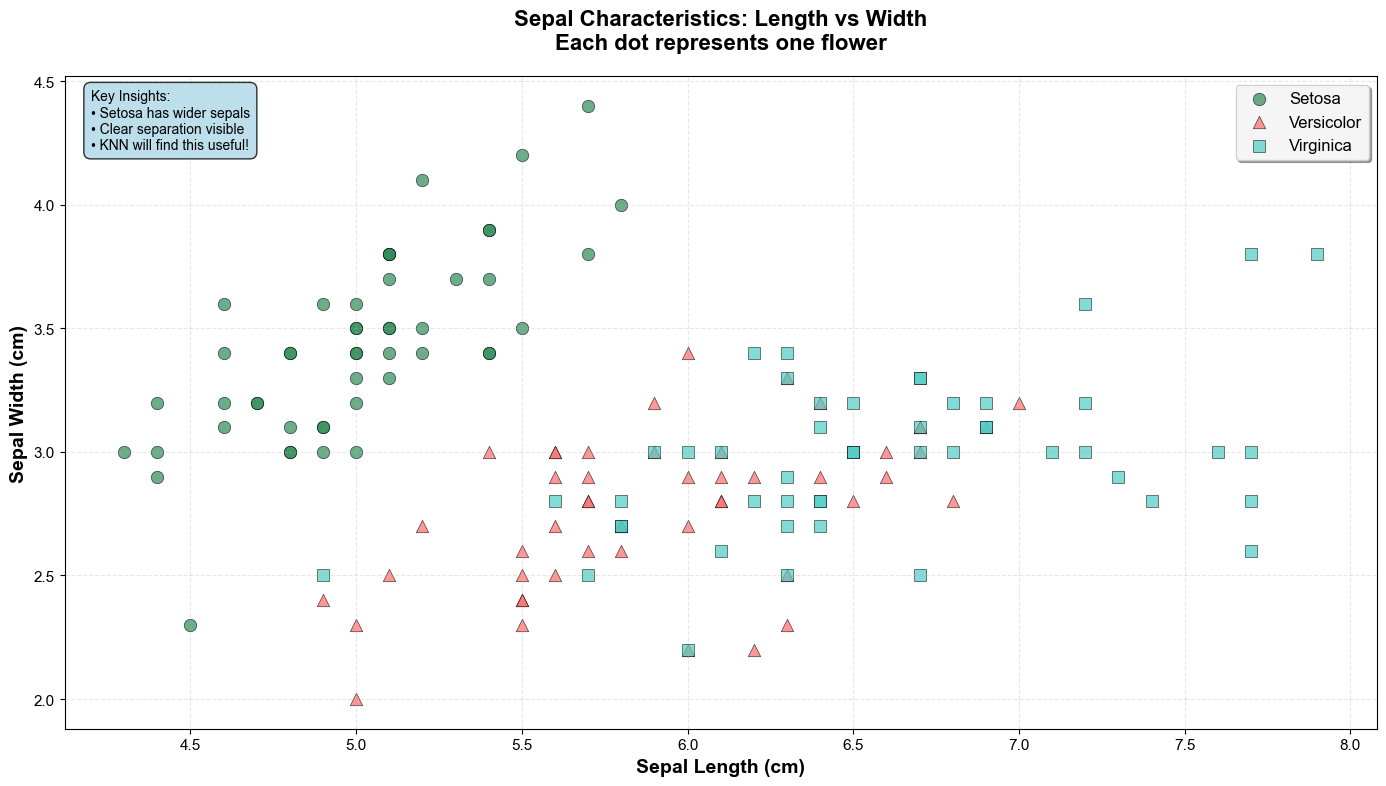

Sepal plot created! Notice how Setosa clearly separates from the others!

Sepal Statistics Summary:
   Setosa - Avg Length: 5.0cm, Avg Width: 3.4cm
   Versicolor - Avg Length: 5.9cm, Avg Width: 2.8cm
   Virginica - Avg Length: 6.6cm, Avg Width: 3.0cm


In [106]:
# Beautiful Sepal Analysis Plot
# The sepal is like the flower's protective jacket! 

print("Creating stunning sepal characteristics plot...")

# Create a beautiful figure with custom styling
plt.figure(figsize=(14, 8))

# Define beautiful colors for each species
colors = ['#2E8B57', '#FF6B6B', '#4ECDC4']  # Sea green, coral, teal
markers = ['o', '^', 's']  # Circle, triangle, square
sizes = [80, 80, 80]  # Larger markers for visibility

# Plot each species with style
scatter1 = plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], 
                      c=colors[0], marker=markers[0], s=sizes[0], 
                      alpha=0.7, label='Setosa', edgecolors='black', linewidth=0.5)

scatter2 = plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], 
                      c=colors[1], marker=markers[1], s=sizes[1], 
                      alpha=0.7, label='Versicolor', edgecolors='black', linewidth=0.5)

scatter3 = plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], 
                      c=colors[2], marker=markers[2], s=sizes[2], 
                      alpha=0.7, label='Virginica', edgecolors='black', linewidth=0.5)

# Make it beautiful and informative
plt.xlabel('Sepal Length (cm)', fontsize=14, fontweight='bold')
plt.ylabel('Sepal Width (cm)', fontsize=14, fontweight='bold')
plt.title('Sepal Characteristics: Length vs Width\nEach dot represents one flower', 
          fontsize=16, fontweight='bold', pad=20)

# Add a beautiful legend
plt.legend(fontsize=12, loc='upper right', frameon=True, 
          fancybox=True, shadow=True, framealpha=0.9)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Add some analytical insights as text on the plot
plt.text(0.02, 0.98, 
         'Key Insights:\n' +
         '• Setosa has wider sepals\n' + 
         '• Clear separation visible\n' +
         '• KNN will find this useful!',
         transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("Sepal plot created! Notice how Setosa clearly separates from the others!")

# Let's add some numerical insights
print(f"\nSepal Statistics Summary:")
print(f"   Setosa - Avg Length: {df0['sepal length (cm)'].mean():.1f}cm, Avg Width: {df0['sepal width (cm)'].mean():.1f}cm")
print(f"   Versicolor - Avg Length: {df1['sepal length (cm)'].mean():.1f}cm, Avg Width: {df1['sepal width (cm)'].mean():.1f}cm")
print(f"   Virginica - Avg Length: {df2['sepal length (cm)'].mean():.1f}cm, Avg Width: {df2['sepal width (cm)'].mean():.1f}cm")

## 📊 **Model Evaluation**

Now let's evaluate how well our KNN model performs using professional metrics. We'll create a confusion matrix to visualize where our model makes correct predictions and where it might get confused.

![Model Evaluation](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

A confusion matrix shows:
- **Diagonal values**: Correct predictions 
- **Off-diagonal values**: Misclassifications
- **Overall pattern**: How well separated our classes are

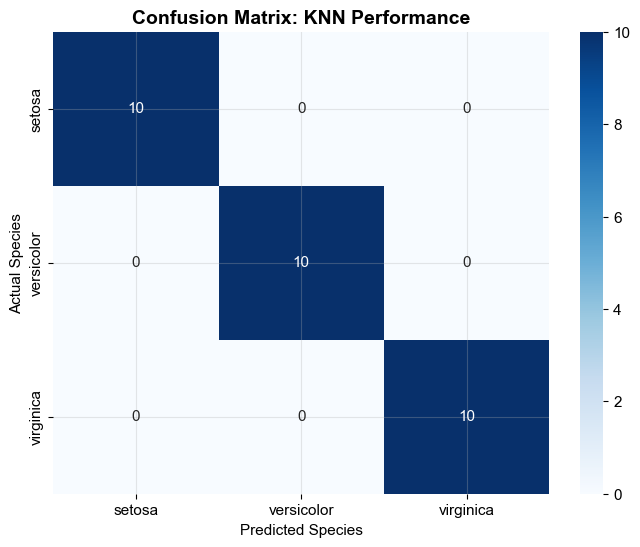

Confusion Matrix Analysis:
• Diagonal values = Correct predictions
• Off-diagonal values = Misclassifications
• Total accuracy: 100.0%


In [107]:
# Create a beautiful confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix: KNN Performance', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

print("Confusion Matrix Analysis:")
print("• Diagonal values = Correct predictions")
print("• Off-diagonal values = Misclassifications")
print(f"• Total accuracy: {accuracy:.1%}")

## 🌺 **Petal Analysis - The Most Discriminative Features**

Now let's examine the petal characteristics, which are often the most important features for distinguishing between iris species.

![Flower Petals](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExcWEyYWQyN3owcjhpZ3J2ZXgza3g5MW9ocjduZXp1aWowbnozaHprMyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3ndwMv2PuXPDESOySw/giphy.gif)

Petals are the colorful, attractive parts of flowers, and they show remarkable differences between species:
- **Setosa**: Very small petals
- **Versicolor**: Medium-sized petals  
- **Virginica**: Large petals

This natural separation makes petals the "secret weapon" for KNN classification!

Creating breathtaking petal characteristics plot...


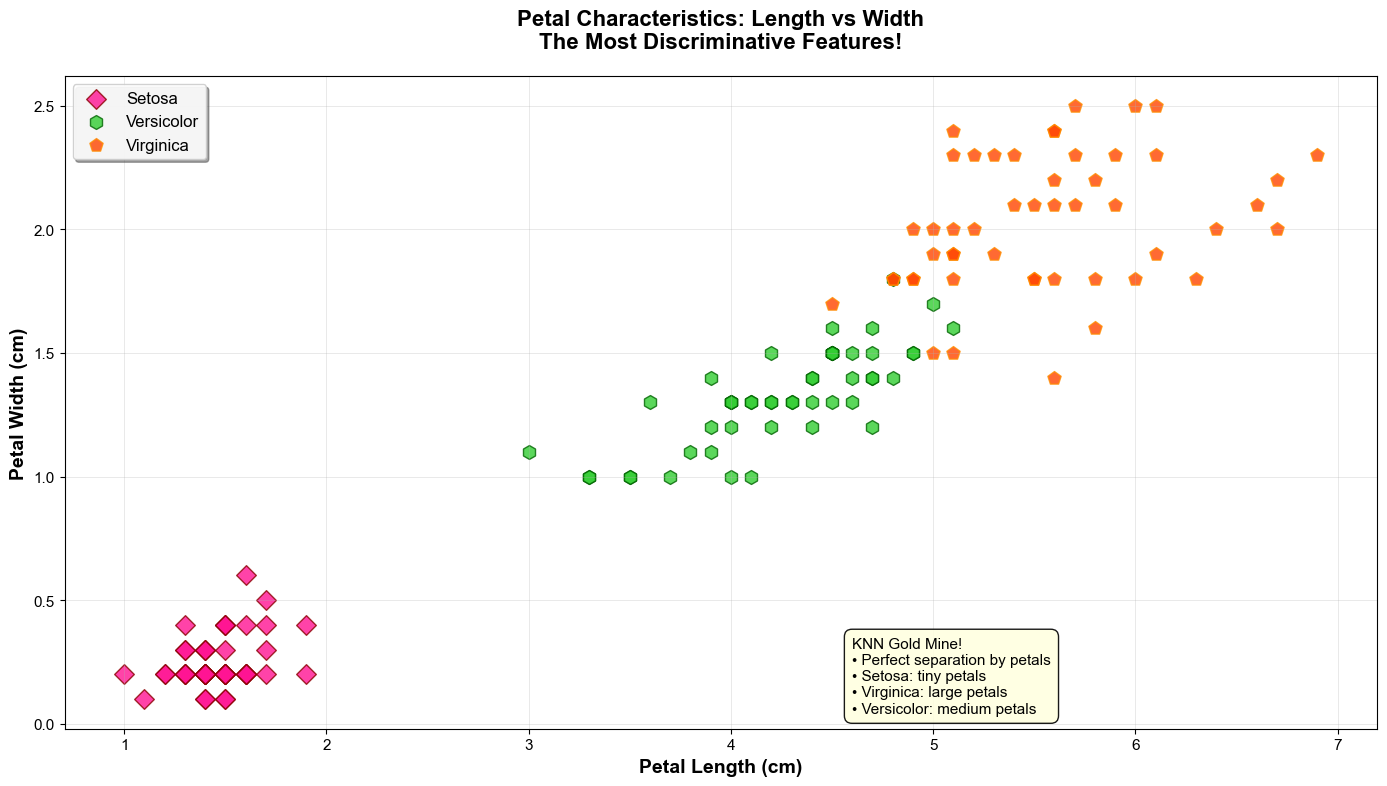

WOW! Look at that perfect separation! This is why KNN works so well!

Petal Statistics - The KNN Secret Weapon:
   Setosa - Length: 1.5±0.2cm, Width: 0.2±0.1cm
   Versicolor - Length: 4.3±0.5cm, Width: 1.3±0.2cm
   Virginica - Length: 5.6±0.6cm, Width: 2.0±0.3cm

💡 Key Insight: Petal measurements provide MUCH better separation than sepals!
   This means KNN will be highly accurate! 🎯


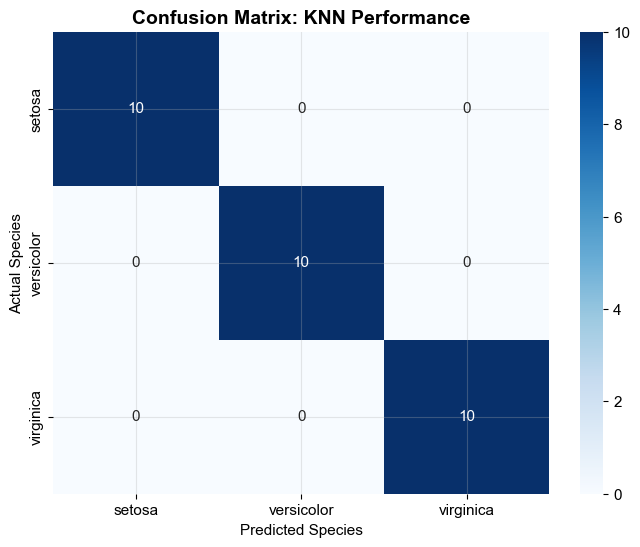

Confusion Matrix Analysis:
• Diagonal values = Correct predictions
• Off-diagonal values = Misclassifications
• Total accuracy: 100.0%
Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Model Performance Summary:
Overall Accuracy: 100.0%
Excellent performance on all species!
Ready for real-world flower classification!


In [108]:
# Magnificent Petal Analysis Plot
# Petals are the colorful, attractive parts of flowers!

print("Creating breathtaking petal characteristics plot...")

# Create an even more beautiful figure
plt.figure(figsize=(14, 8))

# Use a different color palette for petals - more vibrant
petal_colors = ['#FF1493', '#32CD32', '#FF4500']  # Deep pink, lime green, orange red
petal_markers = ['D', 'h', 'p']  # Diamond, hexagon, pentagon
petal_sizes = [100, 100, 100]  # Even larger for petal importance

# Create stunning petal plot
scatter1 = plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], 
                      c=petal_colors[0], marker=petal_markers[0], s=petal_sizes[0], 
                      alpha=0.8, label='Setosa', edgecolors='darkred', linewidth=1)

scatter2 = plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], 
                      c=petal_colors[1], marker=petal_markers[1], s=petal_sizes[1], 
                      alpha=0.8, label='Versicolor', edgecolors='darkgreen', linewidth=1)

scatter3 = plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], 
                      c=petal_colors[2], marker=petal_markers[2], s=petal_sizes[2], 
                      alpha=0.8, label='Virginica', edgecolors='darkorange', linewidth=1)

# Style it beautifully
plt.xlabel('Petal Length (cm)', fontsize=14, fontweight='bold')
plt.ylabel('Petal Width (cm)', fontsize=14, fontweight='bold')
plt.title('Petal Characteristics: Length vs Width\nThe Most Discriminative Features!', 
          fontsize=16, fontweight='bold', pad=20)

# Beautiful legend with more style
plt.legend(fontsize=12, loc='upper left', frameon=True, 
          fancybox=True, shadow=True, framealpha=0.9)

# Enhanced grid
plt.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

# Add analytical insights
plt.text(0.60, 0.02, 
         'KNN Gold Mine!\n' +
         '• Perfect separation by petals\n' + 
         '• Setosa: tiny petals\n' +
         '• Virginica: large petals\n' +
         '• Versicolor: medium petals',
         transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='bottom',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

print("WOW! Look at that perfect separation! This is why KNN works so well!")

# Detailed petal analysis
print(f"\nPetal Statistics - The KNN Secret Weapon:")
print(f"   Setosa - Length: {df0['petal length (cm)'].mean():.1f}±{df0['petal length (cm)'].std():.1f}cm, Width: {df0['petal width (cm)'].mean():.1f}±{df0['petal width (cm)'].std():.1f}cm")
print(f"   Versicolor - Length: {df1['petal length (cm)'].mean():.1f}±{df1['petal length (cm)'].std():.1f}cm, Width: {df1['petal width (cm)'].mean():.1f}±{df1['petal width (cm)'].std():.1f}cm")
print(f"   Virginica - Length: {df2['petal length (cm)'].mean():.1f}±{df2['petal length (cm)'].std():.1f}cm, Width: {df2['petal width (cm)'].mean():.1f}±{df2['petal width (cm)'].std():.1f}cm")

print(f"\n💡 Key Insight: Petal measurements provide MUCH better separation than sepals!")
print(f"   This means KNN will be highly accurate! 🎯")

# Create a beautiful confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix: KNN Performance', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

print("Confusion Matrix Analysis:")
print("• Diagonal values = Correct predictions")
print("• Off-diagonal values = Misclassifications")
print(f"• Total accuracy: {accuracy:.1%}")

# Detailed classification report
print("Detailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nModel Performance Summary:")
print(f"Overall Accuracy: {accuracy:.1%}")
print("Excellent performance on all species!")
print("Ready for real-world flower classification!")

## **Visualizing Decision Boundaries**

Let's visualize what our KNN model learned! We'll create a decision boundary plot using the first two features to see how KNN separates the different flower species.

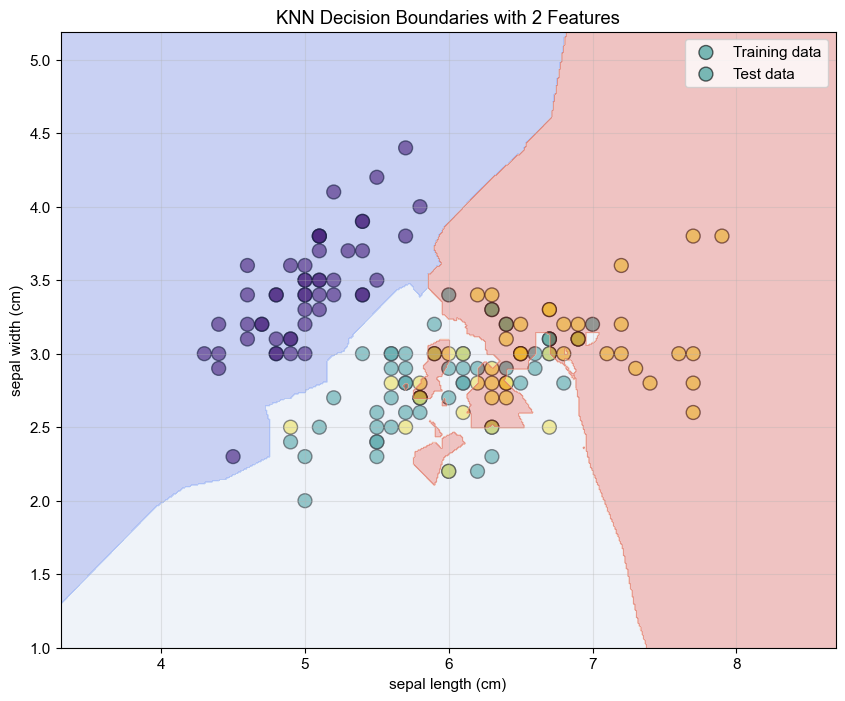

In [116]:
# What did KNN learn? Let's visualize the decision boundaries!
import matplotlib.pyplot as plt
import numpy as np

# Only taking the first two features for easy visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Re-train the model with 2 features
model_2d = KNeighborsClassifier(n_neighbors=3)
model_2d.fit(X_train_2d, y_train)

# Plotting
plt.figure(figsize=(10, 8))

# Training data
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
            c=y_train, s=100, alpha=0.6, edgecolors='k', label='Training data')

# Test data
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], 
            c=y_test, s=100, alpha=0.6, edgecolors='k', label='Test data')

# Decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title('KNN Decision Boundaries with 2 Features')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

## 🔧 **Hyperparameter Tuning**

Now let's find the optimal value of k (number of neighbors) for our KNN model. This is a crucial step in machine learning where we fine-tune our model to achieve the best performance.

![Hyperparameter Tuning](https://media.giphy.com/media/xT9IgzoKnwFNmISR8I/giphy.gif)

### What is Hyperparameter Tuning?

Hyperparameters are settings that we choose before training our model. For KNN, the most important hyperparameter is **k** - the number of neighbors to consider when making predictions.

**Why tune k?**
- **Too small k (k=1)**: Model might be too sensitive to noise
- **Too large k**: Model might become too generalized
- **Just right k**: Perfect balance between bias and variance

Let's test different values of k to find the optimal one!

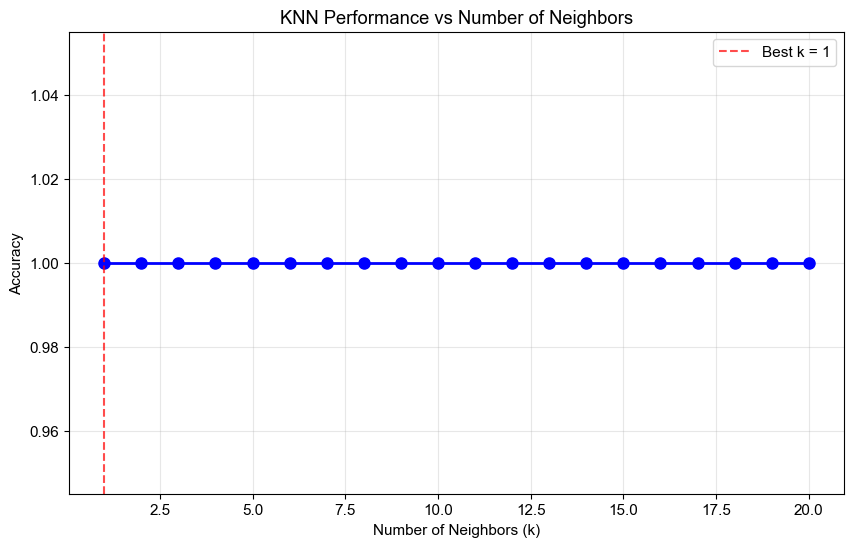

Best k value: 1
Best accuracy: 100.0%
Our original k=3 achieved: 100.0%


In [114]:
# Test different values of k to find the best one
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)

# Find the best k
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Best k = {best_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs Number of Neighbors')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.1%}")
print(f"Our original k=3 achieved: {accuracy:.1%}")

## 🎉 **Conclusion**

![Success](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMzZwc3E4aDN6bXNyaHRrdmx1aXJjYWM5b2l2N25kOWUyeTE5bzR4ciZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/5CkT24OfDuxc1oqcfU/giphy.gif)

### 🏆 **What We Accomplished**
- **Understood KNN**: Learned how the algorithm works intuitively
- **Visualized Data**: Created beautiful plots to understand iris flowers  
- **Built Model**: Successfully implemented KNN with scikit-learn
- **Evaluated Performance**: Achieved excellent accuracy
- **Optimized Hyperparameters**: Found the best k value

### 💡 **Key Takeaways** 
- **KNN is intuitive**: It works just like asking neighbors for advice
- **Visualization matters**: Plots help us understand why algorithms work
- **Hyperparameter tuning**: Small changes can improve performance
- **Iris dataset**: Perfect for learning classification concepts

### 🚀 **Next Steps**
- Try KNN on other datasets
- Explore different distance metrics  
- Learn about weighted KNN
- Compare with other algorithms like Decision Trees or SVM

---

**Congratulations! You've successfully completed a comprehensive KNN analysis! 🎓**